Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [182]:
media = pd.read_csv("mediacompany.csv")

In [183]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [184]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
75,5/15/2017,313945,1808684,2226788,1398052759,1,0,NaN
76,5/16/2017,185689,1814227,2199844,1311961223,1,0,NaN
77,5/17/2017,142260,1755803,2225752,1248266254,1,0,NaN
78,5/18/2017,135871,1749654,2302789,1284859759,1,0,NaN
79,5/19/2017,108961,1746735,2279036,1246026846,1,0,NaN


In [185]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [186]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [187]:
media.drop(["Unnamed: 7"],axis = 1,inplace=True)

In [188]:
media["Date"]=pd.to_datetime(media["Date"])

In [189]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [190]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [191]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [192]:
# Deriving 'days since the show started'

from datetime import datetime

d0 = datetime(2017,2,28)
d1 = media.Date
delta = d1 - d0
media["day"]= delta

In [193]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [194]:
# Cleaning days
media['day'] = media['day'].astype(str)
media["day"].head()

0    1 days 00:00:00.000000000
1    2 days 00:00:00.000000000
2    3 days 00:00:00.000000000
3    4 days 00:00:00.000000000
4    5 days 00:00:00.000000000
Name: day, dtype: object

In [195]:
media['day'] = media['day'].map(lambda x: x[0:2]) # oth and 1st column
media["day"]

0     1 
1     2 
2     3 
3     4 
4     5 
      ..
75    76
76    77
77    78
78    79
79    80
Name: day, Length: 80, dtype: object

In [196]:
media['day'] = media['day'].astype(int)
media['day'].head() 

0    1
1    2
2    3
3    4
4    5
Name: day, dtype: int32

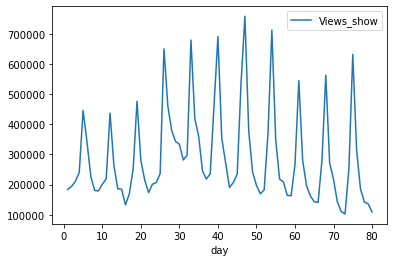

In [197]:
# days vs Views_show

media.plot.line(x="day",y="Views_show")

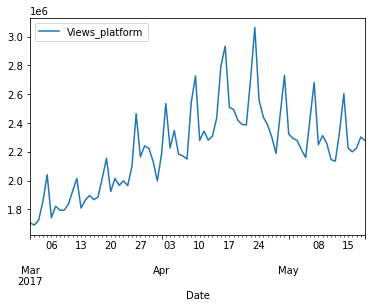

In [198]:
media.plot.line(x="Date",y="Views_platform")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


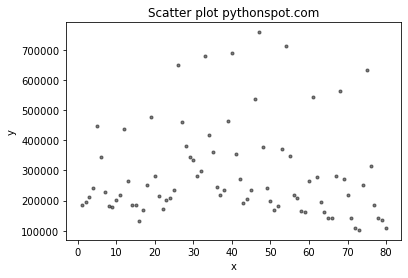

In [199]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


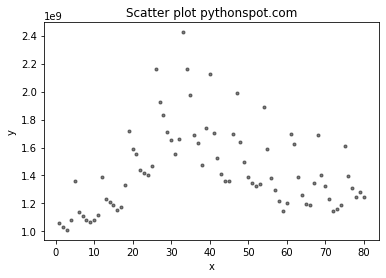

In [200]:
plt.scatter(media.day, media.Ad_impression, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


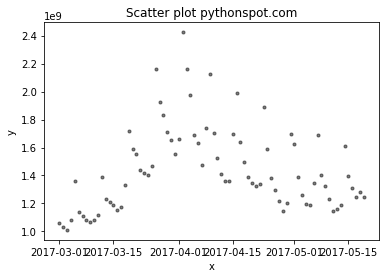

In [201]:
plt.scatter(media.Date, media.Ad_impression, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

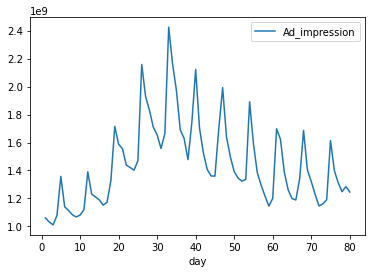

In [202]:
media.plot.line(x="day",y="Ad_impression")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


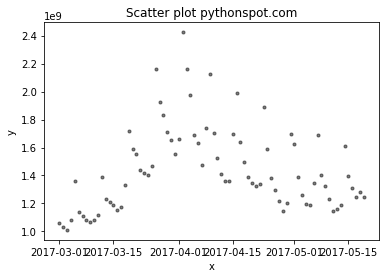

In [203]:
plt.scatter(media.Date, media.Ad_impression, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

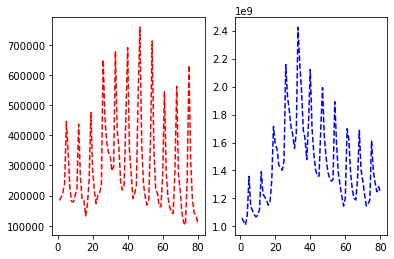

In [204]:
plt.subplot(1,2,1)
plt.plot(media.day,media.Views_show,'r--')
plt.subplot(1,2,2)
plt.plot(media.day,media.Ad_impression,'b--')

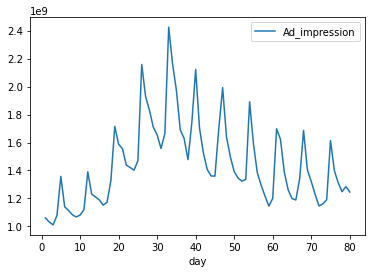

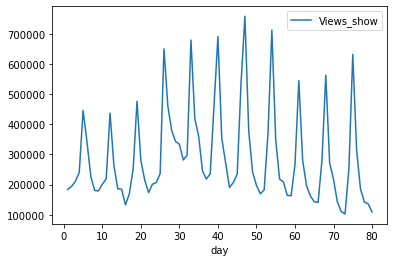

In [205]:
media.plot.line(x="day",y="Ad_impression")
media.plot.line(x="day",y="Views_show")

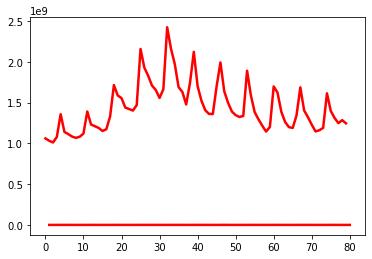

In [206]:
c=[i for i in range(1,80,1)]
fig=plt.figure()
plt.plot(media.day,media.Views_show,media.Ad_impression,color="red",linewidth=2.5,linestyle="-")


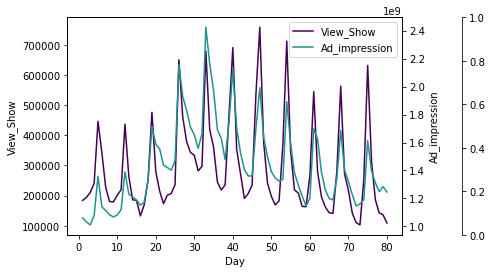

In [207]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")
color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")
lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))     

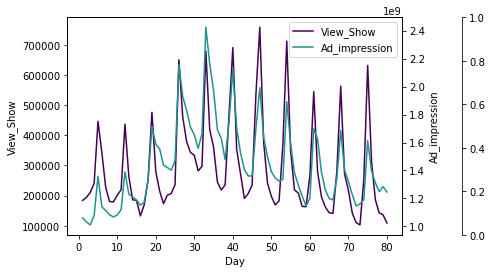

In [208]:
fig = plt.figure()
host = fig.add_subplot(1,1,1)

par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")
color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")
lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))     

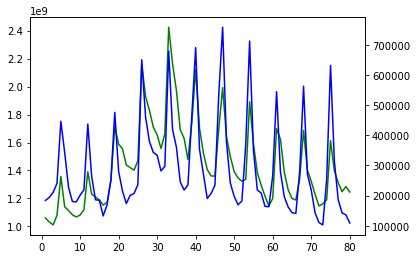

In [209]:
x = media['day']
y1 = media['Ad_impression']
y2 = media['Views_show']

ax2,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-') 

from datetime import date, timedelta

def all_sundays(year):
# January 1st of the given year
       dt = date(year, 1, 1)
# First Sunday of the given year       
       dt += timedelta(days = 6 - dt.weekday())  
       while dt.year == year:
          yield dt
          dt += timedelta(days = 7)
          
for s in all_sundays(2017):
    print(s)

media["weekday"]= (media["day"]+3)%7

media

media['WeekDAY'] = pd.to_datetime(media['Date']).dt.dayofweek  

In [ ]:
import calendar 
  
def findDay(date): 
    day, month, year = (int(i) for i in date.split(' '))     
    dayNumber = calendar.weekday(year, month, day) 
    days =["Monday", "Tuesday", "Wednesday", "Thursday", 
                         "Friday", "Saturday", "Sunday"] 
    return (days[dayNumber]) 
  
# Driver program 
date = '01 03 2017'
print(findDay(date))


In [210]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79


media['WEEKEND'] = np.where((media['Date']).dt.dayofweek < 5,0,1)

In [211]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [212]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7   ### why add 3 --> 1st day was WEDNESDAY..
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Running first model (lm1) weekday & visitors

In [219]:
# Putting feature variable to X
x = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

In [220]:
from sklearn.linear_model import LinearRegression

In [221]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [222]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [225]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.01e-12
Time:                        11:21:06   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

# creaysate Weekend variable,with value 1 at weekends and0 at weekdays

In [228]:
media['WEEKEND'] = np.where((media['Date']).dt.weekday < 5,0,1)

In [229]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [232]:
# Putting feature variable to X
x = media[['Visitors','WEEKEND']]

# Putting response variable to y
y = media['Views_show']

In [233]:
from sklearn.linear_model import LinearRegression

In [234]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [235]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [236]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.51e-12
Time:                        11:37:39   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

# REBUILD the model again by Forward Selection

In [237]:
# Putting feature variable to X
x = media[['Visitors','WEEKEND',"Character_A"]]

# Putting response variable to y
y = media['Views_show']

In [238]:
from sklearn.linear_model import LinearRegression

In [239]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [240]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [241]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.53e-14
Time:                        11:45:23   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [242]:
# Putting feature variable to X
x = media[['Visitors','WEEKEND',"Character_A","Cricket_match_india"]]

# Putting response variable to y
y = media['Views_show']

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [245]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [246]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.28
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.51e-14
Time:                        11:47:58   Log-Likelihood:                -1033.1
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      75   BIC:                             2088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.074e+04   9

In [257]:
# Putting feature variable to X
x = media[['Visitors','WEEKEND',"Character_A","Cricket_match_india","Ad_impression"]]

# Putting response variable to y
y = media['Views_show']

In [258]:
from sklearn.linear_model import LinearRegression

In [259]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [260]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [261]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.61e-25
Time:                        11:51:32   Log-Likelihood:                -1003.9
No. Observations:                  80   AIC:                             2020.
Df Residuals:                      74   BIC:                             2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.867e+05   7

In [300]:
# Putting feature variable to X
x = media[['Visitors','WEEKEND',"Ad_impression","weekday"]]

# Putting response variable to y
y = media['Views_show']

In [301]:
from sklearn.linear_model import LinearRegression

In [302]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [303]:
# fit the model to the training data
lm.fit(x,y)

LinearRegression()

In [304]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x = sm.add_constant(x)
# create a fitted model in one line
lm_1 = sm.OLS(y,x).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           3.10e-33
Time:                        12:10:22   Log-Likelihood:                -985.47
No. Observations:                  80   AIC:                             1981.
Df Residuals:                      75   BIC:                             1993.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.808e+04   6.55e+04      0.276

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

#REBUILD THE MODEL

In [331]:
# Putting feature variable to X
x = media[["Visitors","Views_platform","Ad_impression","Cricket_match_india","Character_A","weekday","WEEKEND"]]

# Putting response variable to y
y = media['Views_show']

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, random_state=100)

In [333]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(56, 7)
(24, 7)
(56,)
(24,)


In [334]:
from sklearn.linear_model import LinearRegression

In [335]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [336]:
# fit the model to the training data
lm.fit(x_train,y_train)

LinearRegression()

In [337]:
print(lm.intercept_)

79113.16245181632


In [338]:
coeff_df = pd.DataFrame(lm.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Visitors,-0.154652
Views_platform,0.159624
Ad_impression,0.000129
Cricket_match_india,-23934.838081
Character_A,18694.997268
weekday,-30467.291188
WEEKEND,166702.834455


In [339]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Views_show')

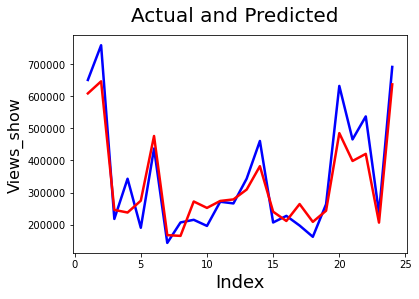

In [340]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views_show', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

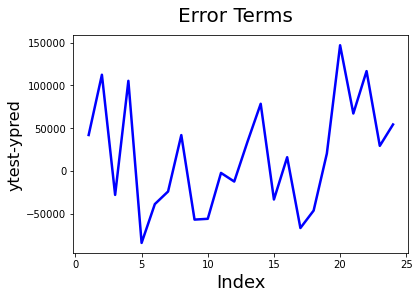

In [341]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [342]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [343]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 4291625401.942426
r_square_value : 0.8708094292488149


In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 
  
print(vif_data)

               feature         VIF
0             Visitors  808.790800
1       Views_platform  896.018200
2        Ad_impression    2.492913
3  Cricket_match_india    1.280394
4          Character_A    3.527721
5              weekday    5.224901
6              WEEKEND    1.586270


In [345]:
import statsmodels.api as sm
x_train_sm = x_train
 
x_train_sm = sm.add_constant(x_train_sm)

lm_1 = sm.OLS(y_train,x_train_sm).fit()

lm_1.params

const                   79113.162446
Visitors                   -0.154652
Views_platform              0.159624
Ad_impression               0.000129
Cricket_match_india    -23934.838081
Character_A             18694.997268
weekday                -30467.291188
WEEKEND                166702.834455
dtype: float64

In [346]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     55.37
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           7.87e-21
Time:                        14:58:23   Log-Likelihood:                -678.35
No. Observations:                  56   AIC:                             1373.
Df Residuals:                      48   BIC:                             1389.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.911e+04   9

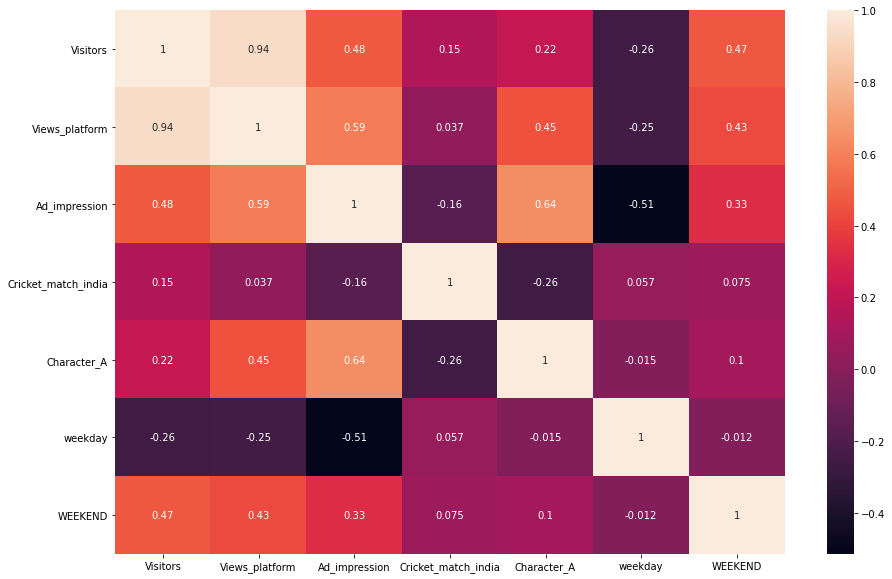

In [347]:
plt.figure(figsize = (15,10))
sns.heatmap(x.corr(),annot = True)

In [ ]:
# REBUILD THE MODEL

In [348]:
x1=media[["Visitors","Ad_impression","Cricket_match_india","Character_A","weekday","WEEKEND"]]

In [351]:
# Putting feature variable to X
x1_train = x_train[["Visitors","Ad_impression","Cricket_match_india","Character_A","weekday","WEEKEND"]]
x1_test =x_test[["Visitors","Ad_impression","Cricket_match_india","Character_A","weekday","WEEKEND"]]

In [352]:
print(x1_train.shape)
print(x1_test.shape)
print(y_train.shape)
print(y_test.shape)

(56, 6)
(24, 6)
(56,)
(24,)


In [353]:
from sklearn.linear_model import LinearRegression

In [354]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [355]:
# fit the model to the training data
lm.fit(x1_train,y_train)

LinearRegression()

In [356]:
print(lm.intercept_)

144626.81479433487


In [357]:
coeff_df = pd.DataFrame(lm.coef_,x1_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Visitors,0.023281
Ad_impression,0.000119
Cricket_match_india,-26970.982102
Character_A,40067.597517
weekday,-32267.050234
WEEKEND,160710.659081


In [358]:
y1_pred = lm.predict(x1_test)

Text(0, 0.5, 'Views_show')

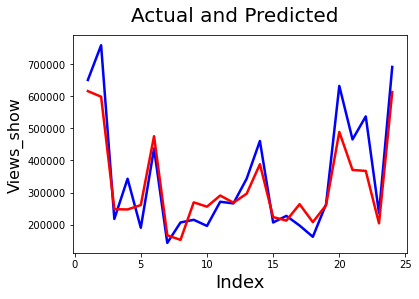

In [359]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y1_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views_show', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

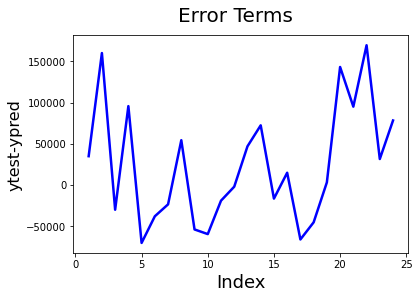

In [360]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test-y1_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [361]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y1_pred)
r_squared = r2_score(y_test, y1_pred)

In [362]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 5574997688.377524
r_square_value : 0.8321761417079775


In [363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = x1.columns

vif_data["VIF"] = [variance_inflation_factor(x1.values, i) 
                          for i in range(len(x1.columns))] 
  
print(vif_data)

               feature        VIF
0             Visitors  61.349603
1        Ad_impression   2.362060
2  Cricket_match_india   1.257352
3          Character_A   2.711340
4              weekday   4.921517
5              WEEKEND   1.510459


In [364]:
import statsmodels.api as sm
x_train_sm = x1_train
 
x_train_sm = sm.add_constant(x_train_sm)

lm_1 = sm.OLS(y_train,x_train_sm).fit()

lm_1.params

const                  144626.814795
Visitors                    0.023281
Ad_impression               0.000119
Cricket_match_india    -26970.982102
Character_A             40067.597517
weekday                -32267.050234
WEEKEND                160710.659081
dtype: float64

In [365]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     63.15
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.34e-21
Time:                        15:14:19   Log-Likelihood:                -679.43
No. Observations:                  56   AIC:                             1373.
Df Residuals:                      49   BIC:                             1387.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.446e+05   8

# REBUILD THE MODEL

In [382]:
x2=media[["Character_A ","Ad_impression","weekday","WEEKEND"]]

In [383]:
# Putting feature variable to X
x2_train = x_train[["Character_A ","Ad_impression","weekday","WEEKEND"]]
x2_test =x_test[["Character_A ","Ad_impression","weekday","WEEKEND"]]

In [384]:
print(x2_train.shape)
print(x2_test.shape)
print(y_train.shape)
print(y_test.shape)

(56, 4)
(24, 4)
(56,)
(24,)


In [385]:
from sklearn.linear_model import LinearRegression

In [386]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

In [387]:
# fit the model to the training data
lm.fit(x2_train,y_train)

LinearRegression()

In [388]:
print(lm.intercept_)

43268.60218395828


In [389]:
coeff_df = pd.DataFrame(lm.coef_,x2_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Visitors,0.016174
Ad_impression,0.000193
weekday,-26991.693647
WEEKEND,150872.248782


In [390]:
y2_pred = lm.predict(x2_test)

Text(0, 0.5, 'Views_show')

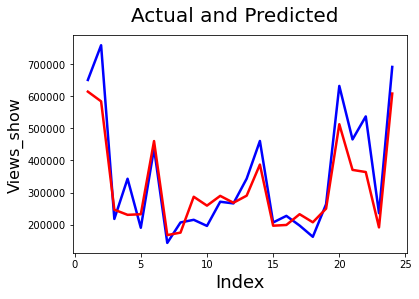

In [391]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y2_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views_show', fontsize=16)                               # Y-label

Text(0, 0.5, 'ytest-ypred')

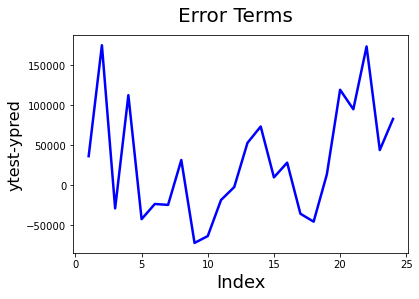

In [392]:
c = [i for i in range(1,25,1)]
fig = plt.figure()
plt.plot(c,y_test-y2_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16) 

In [393]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y2_pred)
r_squared = r2_score(y_test, y2_pred)

In [394]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 5554576405.257018
r_square_value : 0.8327908825053956


In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = x2.columns

vif_data["VIF"] = [variance_inflation_factor(x2.values, i) 
                          for i in range(len(x2.columns))] 
  
print(vif_data)

         feature        VIF
0       Visitors  44.333908
1  Ad_impression   1.450540
2        weekday   4.707430
3        WEEKEND   1.501870


In [396]:
import statsmodels.api as sm
x_train_sm = x2_train
 
x_train_sm = sm.add_constant(x_train_sm)

lm_1 = sm.OLS(y_train,x_train_sm).fit()

lm_1.params

const             43268.602185
Visitors              0.016174
Ad_impression         0.000193
weekday          -26991.693647
WEEKEND          150872.248782
dtype: float64

In [397]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     85.61
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.49e-22
Time:                        15:28:12   Log-Likelihood:                -682.90
No. Observations:                  56   AIC:                             1376.
Df Residuals:                      51   BIC:                             1386.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.327e+04   7.35e+04      0.589

# practice of date and time


In [401]:
#import datetime
from datetime import datetime
# get current date
now = datetime.now()

# convert current date into timestamp
timestamp = datetime.timestamp(now)

print("Date and Time :", now)
print("Timestamp:", timestamp)

Date and Time : 2020-11-18 16:13:46.901040
Timestamp: 1605696226.90104


In [402]:
now = datetime.now()

In [403]:
now

datetime.datetime(2020, 11, 18, 16, 14, 35, 212272)

In [404]:
#import datetime
from datetime import datetime, timedelta
# get current time
now = datetime.now()
print ("Today's date: ", str(now))

#add 15 days to current date
future_date_after_15days = now + timedelta(days = 15)
print('Date after 15 days: ', future_date_after_15days)

#subtract 2 weeks from current date
two_weeks_ago = now - timedelta(weeks = 2)
print('Date two weeks ago: ', two_weeks_ago)
print('two_weeks_ago object type: ', type(two_weeks_ago))

Today's date:  2020-11-18 16:16:27.991460
Date after 15 days:  2020-12-03 16:16:27.991460
Date two weeks ago:  2020-11-04 16:16:27.991460
two_weeks_ago object type:  <class 'datetime.datetime'>


In [405]:
# import datetime
from datetime import date
# Create two dates
date1 = date(2008, 8, 18)
date2 = date(2008, 8, 10)

# Difference between two dates
delta = date2 - date1
print("Difference: ", delta.days)
print('delta object type: ', type(delta))

Difference:  -8
delta object type:  <class 'datetime.timedelta'>


In [406]:
# import datetime
from datetime import datetime
# create two dates with year, month, day, hour, minute, and second
date1 = datetime(2017, 6, 21, 18, 25, 30)
date2 = datetime(2017, 5, 16, 8, 21, 10)

# Difference between two dates
diff = date1-date2
print("Difference: ", diff)

Difference:  36 days, 10:04:20


In [407]:
# current date and time
now = datetime.now()

# get year from date
year = now.strftime("%Y")
print("Year:", year)

# get month from date
month = now.strftime("%m")
print("Month;", month)

# get day from date
day = now.strftime("%d")
print("Day:", day)

# format time in HH:MM:SS
time = now.strftime("%H:%M:%S")
print("Time:", time)

# format date
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("Date and Time:",date_time)

Year: 2020
Month; 11
Day: 18
Time: 16:18:36
Date and Time: 11/18/2020, 16:18:36


In [410]:
# Extract year, month, day, hour, and minute. Assign all these date component to new column.
media['year'] = media['Date'].dt.year
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,2017
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,2017
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,2017
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,2017
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,2017


In [413]:
media['month'] = media['Date'].dt.month
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,2017,3
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,2017,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,2017,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,2017,3
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,2017,3


In [415]:
media['day'] = media['Date'].dt.day
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,2017,3
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,2017,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,2017,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,2017,3
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,2017,3


In [417]:
media['hour'] = media['Date'].dt.hour
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month,hour
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,2017,3,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,2017,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,2017,3,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,2017,3,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,2017,3,0


In [419]:
media['minute'] = media['Date'].dt.minute
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month,hour,minute
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,2017,3,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,2017,3,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,2017,3,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,2017,3,0,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,2017,3,0,0


In [420]:
media['weekday'] = media['Date'].dt.weekday
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month,hour,minute
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,2017,3,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,2017,3,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,2017,3,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,2017,3,0,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,2017,3,0,0


In [2]:
import calendar 
media['day_name'] = media['Date'].dt.weekday_name
media.head()

NameError: name 'media' is not defined

In [423]:
media['dayofyear'] = media['Date'].dt.dayofyear
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month,hour,minute,dayofyear
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,2017,3,0,0,60
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,2017,3,0,0,61
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,2017,3,0,0,62
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,2017,3,0,0,63
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,2017,3,0,0,64


In [427]:
# import timezone from pytz module
from pytz import timezone
# Create timezone US/Eastern
east = timezone('US/Eastern')
# Localize date
loc_dt = east.localize(datetime(2011, 11, 2, 7, 27, 0))
print(loc_dt)

# Convert localized date into Asia/Kolkata timezone
kolkata = timezone("Asia/Kolkata")
print(loc_dt.astimezone(kolkata))

# Convert localized date into Australia/Sydney timezone
au_tz = timezone('Australia/Sydney')
print(loc_dt.astimezone(au_tz))

2011-11-02 07:27:00-04:00
2011-11-02 16:57:00+05:30
2011-11-02 22:27:00+11:00


In [436]:
media['dayofmonth'] = media['Date'].dt.to_pydatetime
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,WEEKEND,year,month,hour,minute,dayofyear,dayofmonth
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,2017,3,0,0,60,<bound method DatetimeProperties.to_pydatetime...
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,2017,3,0,0,61,<bound method DatetimeProperties.to_pydatetime...
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,2017,3,0,0,62,<bound method DatetimeProperties.to_pydatetime...
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,2017,3,0,0,63,<bound method DatetimeProperties.to_pydatetime...
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,2017,3,0,0,64,<bound method DatetimeProperties.to_pydatetime...


In [1]:
import calendar
day = calendar.weekday(2017,3,1)
print calendar.day_name[day]

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(calendar.day_name[day])? (<ipython-input-1-0767b5b53d39>, line 3)